<a href="https://colab.research.google.com/github/merlynmp/Airplane-Sentiment-Analysis/blob/main/airplane_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/Tweets.xlsx')

In [ ]:
df.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760000,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52,NaN,Eastern Time (US & Canada)
1,570301130888121984,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59,NaN,Pacific Time (US & Canada)
2,570301083672812992,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48,Lets Play,Central Time (US & Canada)
3,570301031407624000,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36,NaN,Pacific Time (US & Canada)
4,570300817074462016,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45,NaN,Pacific Time (US & Canada)
5,570300767074180992,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33,NaN,Pacific Time (US & Canada)
6,570300616901320000,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57,San Francisco CA,Pacific Time (US & Canada)
7,570300248553348992,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29,Los Angeles,Pacific Time (US & Canada)
8,570299953286942016,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn'tâ€¦but NOW I DO! :-D",NaN,2015-02-24 11:11:19,San Diego,Pacific Time (US & Canada)
9,570295459631262976,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27,Los Angeles,Eastern Time (US & Canada)


In [ ]:
df.shape

(14640, 15)

In [ ]:
df.dtypes

tweet_id                                 int64
airline_sentiment                       object
airline_sentiment_confidence           float64
negativereason                          object
negativereason_confidence              float64
airline                                 object
airline_sentiment_gold                  object
name                                    object
negativereason_gold                     object
retweet_count                            int64
text                                    object
tweet_coord                             object
tweet_created                   datetime64[ns]
tweet_location                          object
user_timezone                           object
dtype: object

In [ ]:
list(df.columns)

['tweet_id',
 'airline_sentiment',
 'airline_sentiment_confidence',
 'negativereason',
 'negativereason_confidence',
 'airline',
 'airline_sentiment_gold',
 'name',
 'negativereason_gold',
 'retweet_count',
 'text',
 'tweet_coord',
 'tweet_created',
 'tweet_location',
 'user_timezone']

In [ ]:
df.describe(include='all')

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
count,1.464000e+04,14640,14640.000000,9178,10522.000000,14640,40,14640,32,14640.000000,14640,1019,14640,9907,9820
unique,NaN,3,NaN,10,NaN,6,3,7701,13,NaN,14427,832,NaN,3081,85
top,NaN,negative,NaN,Customer Service Issue,NaN,United,negative,JetBlueNews,Customer Service Issue,NaN,@united thanks,"[0.0, 0.0]",NaN,"Boston, MA",Eastern Time (US & Canada)
freq,NaN,9178,NaN,2910,NaN,3822,32,63,12,NaN,6,164,NaN,157,3744
mean,5.692184e+17,NaN,0.900169,NaN,0.638298,NaN,NaN,NaN,NaN,0.082650,NaN,NaN,2015-02-21 11:33:24.781216,NaN,NaN
min,5.675883e+17,NaN,0.335000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,2015-02-16 23:36:05,NaN,NaN
25%,5.685592e+17,NaN,0.692300,NaN,0.360600,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,2015-02-19 15:54:05.750000128,NaN,NaN
50%,5.694779e+17,NaN,1.000000,NaN,0.670600,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,2015-02-22 04:44:35.500000,NaN,NaN
75%,5.698905e+17,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,2015-02-23 08:04:11,NaN,NaN
max,5.703106e+17,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,44.000000,NaN,NaN,2015-02-24 11:53:37,NaN,NaN


In [ ]:
df['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [ ]:
df['negativereason'].unique()

array([nan, 'Bad Flight', "Can't Tell", 'Late Flight',
       'Customer Service Issue', 'Flight Booking Problems',
       'Lost Luggage', 'Flight Attendant Complaints', 'Cancelled Flight',
       'Damaged Luggage', 'longlines'], dtype=object)

In [ ]:
df['airline'].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='airline', ylabel='count'>

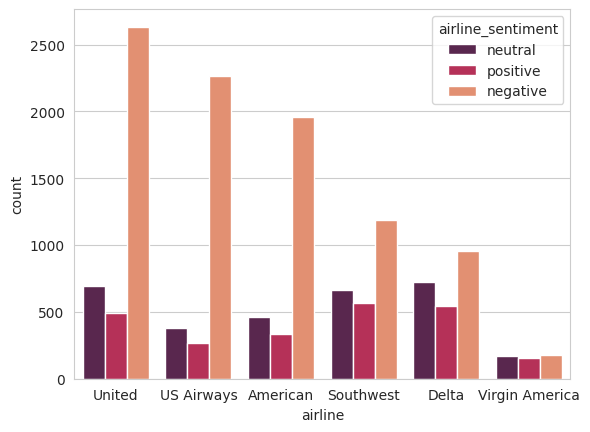

In [ ]:
sns.set_style('whitegrid')
sns.countplot(data = df, x = 'airline', palette = 'rocket', hue = 'airline_sentiment', order = df['airline'].value_counts().index)

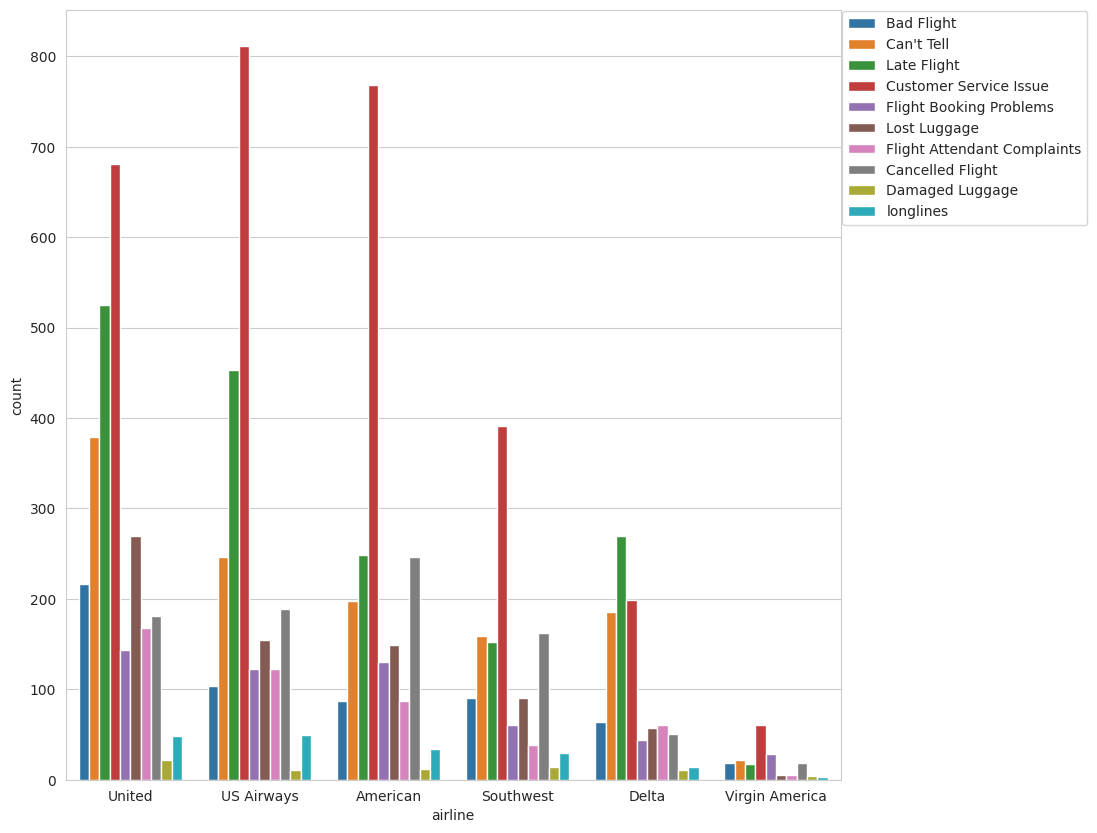

In [ ]:
plt.figure(figsize = (10,10))
sns.countplot(data = df, x = 'airline', hue = 'negativereason', order = df['airline'].value_counts().index)
plt.legend(bbox_to_anchor = (1, 1), loc = 2, borderaxespad = 0.1)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Customer Service Issue'),
  Text(1, 0, 'Late Flight'),
  Text(2, 0, "Can't Tell"),
  Text(3, 0, 'Cancelled Flight'),
  Text(4, 0, 'Lost Luggage'),
  Text(5, 0, 'Bad Flight'),
  Text(6, 0, 'Flight Booking Problems'),
  Text(7, 0, 'Flight Attendant Complaints'),
  Text(8, 0, 'longlines'),
  Text(9, 0, 'Damaged Luggage')])

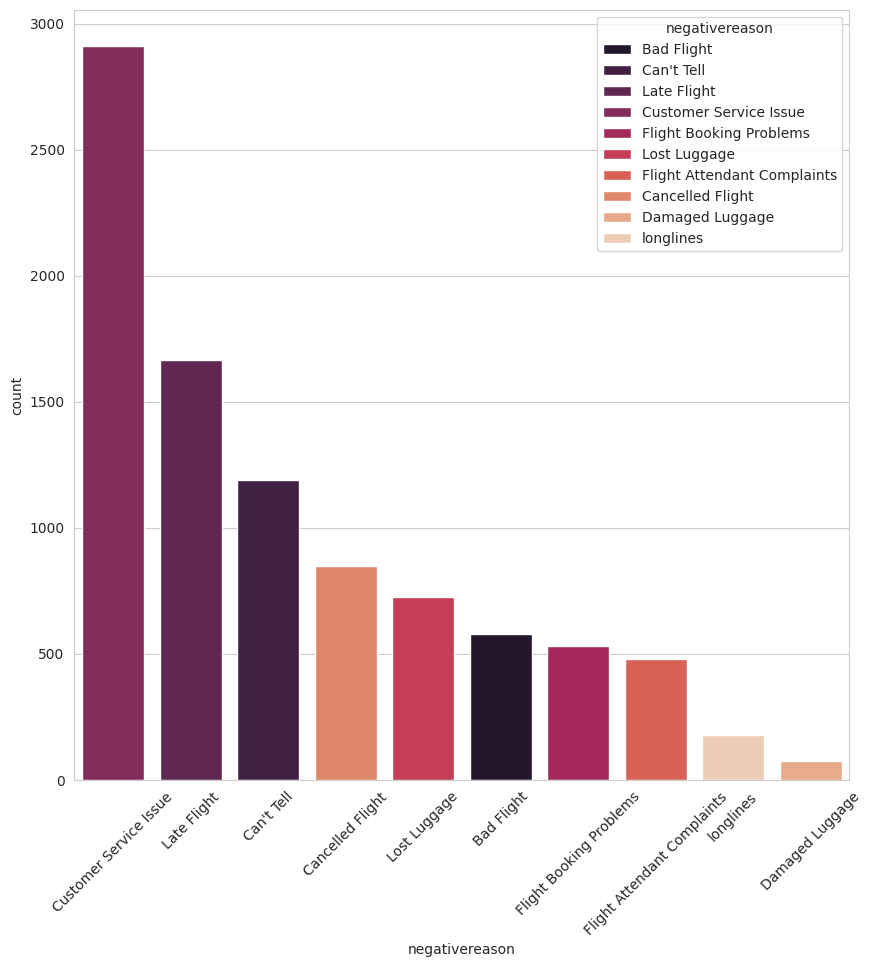

In [ ]:
plt.figure(figsize = (10,10))
sns.countplot(data = df, x = 'negativereason', hue = 'negativereason', palette = 'rocket', order = df['negativereason'].value_counts().index)
plt.xticks(rotation = 45)

# Processing text

In [ ]:
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
from nltk import PorterStemmer as Stemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
processed_text_list = []

In [ ]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
def processing_text(text):

  # converts string to lowercase
  text = text.lower()

  # removes @
  text = re.sub(r'@[A-Za-z0-9]+', '', text)

  # removes header
  text = re.sub(r'https://[A-Za-z0-9]+', '', text)

  # removing commonly used words
  stopWords = set(stopwords.words('english'))

  stopWords_extend = ["not", "no", "won't", "isn't", "couldn't", "wasn't", "didn't", "shouldn't",
"hasn't", "wouldn't", "haven't", "weren't", "hadn't", "shan't", "doesn't",
"mightn't", "mustn't", "needn't", "don't", "aren't", "won't"]

  text = text.split()

  text = ' '.join([j for j in text if (j not in stopwords.words('english') or j in stopWords_extend)])

  # removes punctuation
  text = ''.join([j for j in text if j not in string.punctuation])

  # removes digits
  text = ''.join([j for j in text if not j.isdigit()])

  #stemmization
  text = word_tokenize(str(text))
  st = Stemmer()
  text = text = [st.stem(j) for j in text]
  text = ' '.join(text)

  #lemmatization
  wnt = WordNetLemmatizer().lemmatize
  text = word_tokenize(str(text))
  pos_word = pos_tag(text)
  lemm_words = [wnt(sw[0], get_wordnet_pos(sw[1])) for sw in pos_word]
  text = ' '.join(lemm_words)

  return text

In [ ]:
  for i in df['text']:
    processed_text_list.append(processing_text(i))

In [ ]:
df['processed_text'] = processed_text_list

In [ ]:
df.to_csv('/content/drive/MyDrive/merlynpothen_workshop3.csv', index=False)

In [ ]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,processed_text
0,570306133677760000,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52,NaN,Eastern Time (US & Canada),say
1,570301130888121984,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59,NaN,Pacific Time (US & Canada),plu ad commerci experi tacki
2,570301083672812992,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48,Lets Play,Central Time (US & Canada),didnt today must mean need take anoth trip
3,570301031407624000,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36,NaN,Pacific Time (US & Canada),realli aggress blast obnoxi entertain guest fa...
4,570300817074462016,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45,NaN,Pacific Time (US & Canada),realli big bad thing


In [ ]:
from IPython.display import HTML
HTML (df.head().to_html())

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,processed_text
0,570306133677760000,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52,NaN,Eastern Time (US & Canada),say
1,570301130888121984,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59,NaN,Pacific Time (US & Canada),plu ad commerci experi tacki
2,570301083672812992,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48,Lets Play,Central Time (US & Canada),didnt today must mean need take anoth trip
3,570301031407624000,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36,NaN,Pacific Time (US & Canada),realli aggress blast obnoxi entertain guest face amp littl recours
4,570300817074462016,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45,NaN,Pacific Time (US & Canada),realli big bad thing


# Removing missing data

In [ ]:
df.isnull().head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,False,False,False,True,True,False,True,False,True,False,False,True,False,True,False
1,False,False,False,True,False,False,True,False,True,False,False,True,False,True,False
2,False,False,False,True,True,False,True,False,True,False,False,True,False,False,False
3,False,False,False,False,False,False,True,False,True,False,False,True,False,True,False
4,False,False,False,False,False,False,True,False,True,False,False,True,False,True,False


In [ ]:
import numpy as np

In [ ]:
count_null = np.sum(df.isnull(), axis = 0)
count_null

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [ ]:
df.drop(columns = ['airline_sentiment_gold', 'negativereason_gold', 'tweet_coord'], inplace = True)

In [ ]:
list(df.columns)

['tweet_id',
 'airline_sentiment',
 'airline_sentiment_confidence',
 'negativereason',
 'negativereason_confidence',
 'airline',
 'name',
 'retweet_count',
 'text',
 'tweet_created',
 'tweet_location',
 'user_timezone']

In [ ]:
df.dtypes

tweet_id                                 int64
airline_sentiment                       object
airline_sentiment_confidence           float64
negativereason                          object
negativereason_confidence              float64
airline                                 object
name                                    object
retweet_count                            int64
text                                    object
tweet_created                   datetime64[ns]
tweet_location                          object
user_timezone                           object
dtype: object

In [ ]:
mean_rating = df['negativereason_confidence'].mean()
mean_rating

0.6382982797947159

In [ ]:
df['negativereason_confidence'].fillna(value = mean_rating, inplace = True)

In [ ]:
df.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,negativereason_confidence_clean
0,570306133677760000,neutral,1.0000,NaN,0.638298,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52,NaN,Eastern Time (US & Canada),True
1,570301130888121984,positive,0.3486,NaN,0.000000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59,NaN,Pacific Time (US & Canada),False
2,570301083672812992,neutral,0.6837,NaN,0.638298,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48,Lets Play,Central Time (US & Canada),True
3,570301031407624000,negative,1.0000,Bad Flight,0.703300,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36,NaN,Pacific Time (US & Canada),False
4,570300817074462016,negative,1.0000,Can't Tell,1.000000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45,NaN,Pacific Time (US & Canada),False
5,570300767074180992,negative,1.0000,Can't Tell,0.684200,Virgin America,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,2015-02-24 11:14:33,NaN,Pacific Time (US & Canada),False
6,570300616901320000,positive,0.6745,NaN,0.000000,Virgin America,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",2015-02-24 11:13:57,San Francisco CA,Pacific Time (US & Canada),False
7,570300248553348992,neutral,0.6340,NaN,0.638298,Virgin America,pilot,0,@VirginAmerica Really missed a prime opportuni...,2015-02-24 11:12:29,Los Angeles,Pacific Time (US & Canada),True
8,570299953286942016,positive,0.6559,NaN,0.638298,Virgin America,dhepburn,0,"@virginamerica Well, I didn'tâ€¦but NOW I DO! :-D",2015-02-24 11:11:19,San Diego,Pacific Time (US & Canada),True
9,570295459631262976,positive,1.0000,NaN,0.638298,Virgin America,YupitsTate,0,"@VirginAmerica it was amazing, and arrived an ...",2015-02-24 10:53:27,Los Angeles,Eastern Time (US & Canada),True


In [ ]:
np.sum(df['negativereason_confidence'].isnull(), axis = 0)

0